## 11.numpy的随机抽样

* 离散型随机变量

 > * 二项分布
 > * 泊松分布
 > * 超几何分布
 
 
 * 连续型随机变量
 
 > * 均匀分布
 > * 正态分布
 > * 指数分布
 
 
 * 其他随机函数
 
 > * 随机从序列种获取元素
 > * 对数据集进行洗牌操作
 
 
numpy.random对python种的random进行了补充，增加了一些用于高效生成多种概率分布的的样本值函数


### 11.1 离散型随机变量

** a.二项分布**

* **数学定义：**二项分布是指，每次实验只有两次结果，独立进行多次实验的概率分布问题。例，10次抛硬币中有6次字向上的概率。
* **代码表示：** binom.pmf(k) = choose(n,k) p^k (1-p)^ (n-k)
* **数学表达式：** 
$$
p\{X=k\}= (_{k}^{n})p^{k}(1-p)^{n-k}
$$


* ** numpy中的实现函数 **

  numpy.random.binomial(n,p,size=None)
  
  n表示 单次实验中抛硬币的次数，int类型，传入浮点类型也会被当做int
  
  p表示 单次实验中成功的概率（硬币向上的次数），0<= p <= 1
  
  size表示  进行多少次单次实验
  
  函数输出的是一个长度为size的数组，表示每次采样 事件成功的次数（硬币向上的次数）
  
【例1】np.random.binomial函数说明

以抛硬币为例子说明，也就是p=0.5

In [11]:
import numpy as np

np.random.seed(2020)  # 设置固定的随机数种子，保证生成随机数的规则一致

# 一个完整的实验：抛两次硬币（n=2），每次硬币向上的概率是0.5（p=0.5）
# 我们做5次完整的实验 size = 5，
# 记录下来每次完整实验的结果，实验中硬币向上的次数（事件成功的次数）
np.random.binomial(2,0.5,size = 5)


array([2, 2, 1, 1, 1])

In [12]:
# 上面的结果表示 第一次实验 2个硬币朝上，第二次实验，2个硬币朝上，第三次实验1个硬币朝上，第四次实验1个硬币朝上，第五次实验1个硬币朝上

# size越大，采样次数越大，得到的结果越接近数学公式计算得到的值

还是以抛硬币为例，进一步了解函数的使用方式

案例：抛两个硬币，抛到正反面的概率都是0.5 那么两个硬币都是正面的概率是多少？

$$
p\{X=2\}= (_{2}^{2})(\frac{1}{2})^{2} *( \frac{1}{2})^{0}=0.25
$$

In [14]:

np.random.seed(2020)

x1 = sum( (np.random.binomial(2,0.5,size=100))==2)/100
print('size=100',x1 )

x2 = sum( (np.random.binomial(2,0.5,size=1000))==2)/1000
print('size=100',x2 )

x3 = sum( (np.random.binomial(2,0.5,size=10000))==2)/10000
print('size=100',x3 )

# 可以发现采样次数越大，得到的概率越接近数学公式计算的结果

size=100 0.26
size=100 0.242
size=100 0.2458


【例2】野外正在进行9（n=9）口石油勘探井的发掘工作，每一口井能够开发出油的概率是0.1（p=0.1）。请问，最终所有的勘探井都勘探失败的概率？

In [16]:
x = sum( (np.random.binomial(9,0.1,size=10000))==0)/10000
x

0.3865

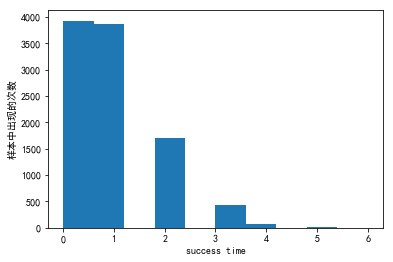

In [48]:
## 使用maltiplot将概率分布画出来

import matplotlib.pyplot as plt
from scipy import stats

# 为matplotlib添加中文库
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 设置随机数种子

np.random.seed(2020)

# 设置随机数参数
n = 9
p = 0.1
size = 10000

x = np.random.binomial(n,p,size)


#绘制图形

plt.hist(x, )  ## 直接绘制直方图，刻度线不对称怎么解决？
plt.xlabel('success time')
plt.ylabel('样本中出现的次数')
plt.show()

In [54]:
#  函数返回列表中每个元素的概率值

s = stats.binom.pmf(range(10),n,p)
print(np.around(s,3))

[0.387 0.387 0.172 0.045 0.007 0.001 0.    0.    0.    0.   ]


【例3】模拟投硬币，投2次，请问两次都为正面的概率？

In [17]:
x = sum( (np.random.binomial(2,0.5,size=10000))==2)/10000
x

0.252

** b.泊松分布**

* **数学定义：** 泊松分布适合于描述单位时间内随机事件发生的次数的概率，参数λ是单位时间(或单位面积)内随机事件的平均发生次数
* **代码表示：** possion.pmf(k) = exp(-lam) lam*k/k!
* **数学表达式：** 
$$
P\{X = k\} = \frac{\lambda^k}{k!}e^{-\lambda} , k=0,1,...
$$


* ** numpy中的实现函数 **

  numpy.random.poisson(lam=1.0,size=None)
  
  lam表示 单位时间内发生该事件的次数
  
  size表示  进行多少次单次实验
  
  函数输出的是一个长度为size的数组，表示每次采样 单位时间内该事件发生的次数
  
【例4】np.random.possion

假定某航空公司预定票处平均每小时接到42次订票电话，那么10分钟内恰好接到6次电话的概率是多少？

0.1451


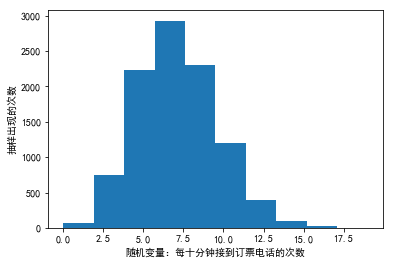

In [57]:

lamda = 42/6
size = 10000

#
np.random.seed(2020)

#
x = np.random.poisson(lamda, size)

print(sum(x==6)/size)


# 绘制图像

plt.hist(x)
plt.xlabel('随机变量：每十分钟接到订票电话的次数')
plt.ylabel('抽样出现的次数')

plt.show()

** c.超几何分布**

* **数学定义：**  它描述了从有限N个物件（其中包含M个指定种类的物件）中抽出n个物件，成功抽出该指定种类的物件的次数（不放回）的概率。
* **代码表示：**  
* **数学表达式：** 
$$
p(k,M,n,N) = \frac{(_{k}^{n})(_{N-k}^{M-n})}{(_{N}^{M})}
$$


* ** numpy中的实现函数 **

  np.random.hypergeometric(ngood,nbad,nsample,size=None)
  
  用工厂抽样检查来解释，总共有N件货物，其中次品M件，现在抽取n个物品，n个物品中有k个次品的概率
  
  ngood 表示 总体中 具有成功标志的元素个数（次品有多少）
  
  nbad 表示  总体中 具有失败标志的元素个数（非次品有多少） ngood + nbad = N
  
  nsamples 表示 抽取样本的次数（抽取物品的次数）
  
  size表示  进行多少次单次实验
  
  函数输出的是一个长度为size的数组，表示抽取的nsamples次样本中 有多少个成功的样本
  
【例5】 np.random.hypergeometric

一共20只动物里有7只是狗，抽取12只有3只狗的概率（无放回抽样）。

0.19844


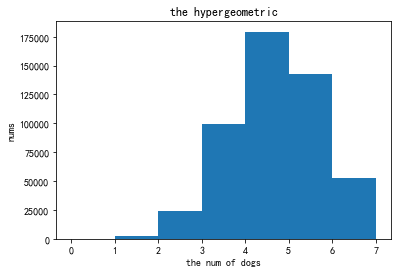

In [64]:
import matplotlib.pyplot as plt
from scipy import stats


#
ngood = 7
nbad =13
nsample = 12
size = 500000

#
np.random.seed(2020)
x = np.random.hypergeometric(ngood,nbad,nsample,size)

print(sum(x==3)/size)

# 绘制直方图
plt.hist(x,bins=7)
plt.xlabel("the num of dogs")
plt.ylabel("nums")
plt.title('the hypergeometric')
plt.show()

In [69]:
# 利用hypergeom.pmf(k,M,n,N,loc)来计算k次成功的概率
x = range(8)
s = stats.hypergeom.pmf(k=x,M=20,n=7,N=12)
print(np.round(s,3))

[0.    0.004 0.048 0.199 0.358 0.286 0.095 0.01 ]


### 11.2 连续性随机变量

** a.均匀分布**

* **数学定义：** 在区间（a，b）之间的分布概率相同
* **数学表达式：** 
$$
f(x) = \frac{1}{b-a},a<x<b
$$


* ** numpy中的实现函数 **

  numpy.random.uniform(low=0.0, high=1.0, size=None)
  
  从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
  
【例6】在low到high范围内，创建大小为size的均匀分布的随机数。

True
True
0.40006


<function matplotlib.pyplot.show(*args, **kw)>

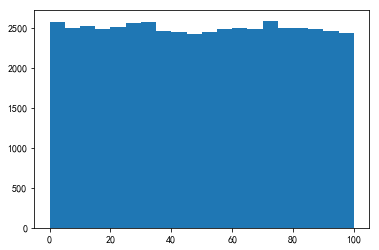

In [72]:

#
low = 0
hight=100
size = 50000

np.random.seed(2020)
x = np.random.uniform(low,hight,size)
print(np.all(x>=0))
print(np.all(x<100))

print((sum(x<50)-sum(x<10))/size)


# 绘制图形
plt.hist(x,bins = 20)
plt.show

In [74]:
# 使用stats函数库可以实现概率计算

a = stats.uniform.cdf(10,0,100)
b = stats.uniform.cdf(50,0,100)
print(b - a)

0.4


**均匀分布的随机数的特例**

* 得到[0，1）之间的均匀分布的随机数 np.random.rand(d0,d1,...dn)
* 得到[low，high）之间均匀分布的随机整数 np.random.randint(low,high=None,size=None)

【例7】根据指定大小产生[0,1)之间均匀分布的随机数。

In [75]:
np.random.rand()

0.6100805648040187

In [77]:
np.random.rand(4,3) # 4*3 的二维数组

array([[0.86818987, 0.26304566, 0.27584691],
       [0.29989078, 0.40633654, 0.99870035],
       [0.99110679, 0.31309628, 0.11485571],
       [0.72722094, 0.42528438, 0.25971675]])

In [80]:
np.random.rand(4,3,1) #4*3*1 的三维数组

array([[0.64917046, 0.32587321, 0.59567608],
       [0.7512917 , 0.65309393, 0.2578775 ],
       [0.48836504, 0.33840783, 0.53006479],
       [0.44581071, 0.53596706, 0.59851081]])

In [81]:
np.random.seed(2020)
print(np.random.uniform(size=(4,3)))

[[0.98627683 0.87339195 0.50974552]
 [0.27183571 0.33691873 0.21695427]
 [0.27647714 0.34331559 0.86215894]
 [0.15669967 0.14088724 0.75708028]]


【例8】若high不为None时，取[low,high)之间随机整数，否则取值[0，low)之间随机整数

In [83]:
np.random.seed(2020)
np.random.randint(5,size = 10)

array([0, 0, 3, 3, 3, 3, 0, 0, 0, 0])

In [84]:
np.random.randint(1,10,size = [3,4])

array([[4, 8, 3, 4],
       [7, 6, 1, 5],
       [9, 7, 5, 2]])

** b.正态分布**

* **数学定义：** 
* **数学表达式：** 
$$
f(x) = \frac{exp(-x^2/2)}{\sqrt{2\pi}}
$$


* ** numpy中的实现函数 **

  numpy.random.randn(d0,d1,...,dn)
  
  按标准正态分布生成d0*d1*...*dn 形状的数组

【例9】根据指定大小产生满足标准正态分布的数组（均值为0，标准差为1）

0.6866
0.956
0.998


<function matplotlib.pyplot.show(*args, **kw)>

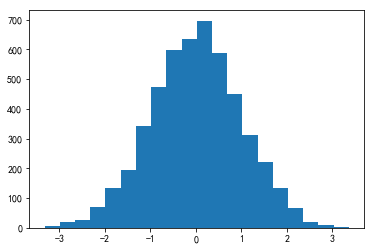

In [90]:

# 
np.random.seed(2020)
size = 5000

# 
x = np.random.randn(size)

y1 = (sum(x<1)- sum(x<-1))/size
y2 = (sum(x<2)- sum(x<-2))/size
y3 = (sum(x<3)- sum(x<-3))/size

print(y1)
print(y2)
print(y3)


# 绘制图像
plt.hist(x,bins =20)
plt.show

In [91]:
# 使用stats库获得概率

stats.norm.cdf(1) - stats.norm.cdf(-1)


0.6826894921370859

* 可以指定高斯分布中的参数，得到随机数，即指定高斯分布的mu和sigma

* ** numpy中的实现函数 **

  numpy.random.normal(loc=0.0,scale=1.0,size =None)
  
  按均值为loc(mu)，标准差为scale（sigma），大小为size的数组
  
【例10】根据指定大小产生满足正态分布的数组（均值为mu，标准差为sigma）

In [95]:
# 
np.random.seed(2020)
mu = 5 #均值
sigma = 0.5 # 标准差
x= np.random.normal(mu,sigma,size=(3,4))
print(x)


#
x= np.random.normal(mu,sigma,size=50000)
print(np.mean(x))
print(np.std(x,ddof=1))  ## ddof的参数表示 =0 最终公式/n 标准差偏小 ddof=1 最终公式/n-1，标准差偏大，默认为0


[[4.11557715 5.03777614 4.43468515 4.67428492]
 [4.55344219 4.36294951 4.96942278 5.03225692]
 [5.20505647 4.71355875 4.59933319 5.6560176 ]]
5.001891840405788
0.4973929539955145


In [96]:
print(np.std(x)) 

0.4973879800411046


** c.指数分布 **

* **数学定义：** 连续概率分布，事件以恒定平均速率连续且独立地发生的过程，λ > 0是分布的一个参数，即每单位时间内发生某事件的次数。

* **数学表达式：** 
$$
f(x)=
\begin{cases}
\lambda * e^{-\lambda * x} & \text{x>0}\\
0& \text{x<=0}
\end{cases}$$


* ** numpy中的实现函数 **

   **numpy.random.exponential(scale=1.0,size=None)**
  
  scale表示的是单位时间内发生某时间的次数
  
  函数输出的是  按照 参数为 scale = lambda 指数分布生成的随机数
  
 【例11】指数分布

0.63426


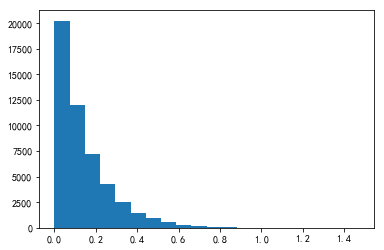

In [98]:
lam = 7
size = 50000

x = np.random.exponential(1/lam,size)

print(sum(x<(1/7))/size)  ## 这里有没有数学含义？

plt.hist(x,bins=20)
plt.show()

In [99]:
## 可以使用stats函数库计算概率

stats.expon.cdf(1/7,scale = 1/lam)

0.6321205588285577

### 11.3 其他随机函数

** a.随机从序列中获取元素 **

* ** numpy中的实现函数 **

   **numpy.random.choice(a,size,replace = True , p=None)**
   
   参数说明
   >* a：若a为整数，元素取值从np.range(a)中随机获取；若a为数组，则从该数组随机获取
   >* size: 随机抽样的维度
   >* replace: 输出的数能否重复，Fale表示不能重复
   >* p: 指定每个数被选择的概率 总和为1


【例12】numpy.random.choice的使用


In [100]:
# 从0-9 10个数中选择3个数

np.random.choice(10,3)

array([1, 3, 4])

In [102]:
# 从0-9 10个数中选择3个数,并指定每个数被选择的概率

np.random.choice(10,3,p = [0.1,0.1,0.4,0.4,0,0,0,0,0,0])

array([2, 2, 3], dtype=int64)

In [103]:
# 从0-9 10个数中选择不重复的3个数

np.random.choice(10,3,replace = False)

array([5, 8, 6])

In [104]:
# 从数组中随机选择元素

arr = ['a','b','c','d','e']
np.random.choice(arr,2)

array(['e', 'c'], dtype='<U1')

** b.对数据集进行洗牌操作 **

* ** numpy中的实现函数 **
   
 **  numpy.random.shuffle(x)**
   
   对数组x进行重排序，如果x为多维数组，只对第一维的数组打乱顺序（下面有例子参考）
   
   同时需要注意的是，shffle是没有返回值的，是在原数组上打乱顺序


【例13】np.random.shuffle(x)的使用

In [106]:
# 一维数组的打乱

np.random.seed(2020)
x = np.arange(10)
np.random.shuffle(x)
print(x)

[2 4 9 1 5 7 6 3 8 0]


In [110]:
# 多维数组的打乱

np.random.seed(2020)
x= np.arange(20).reshape(4,5)
print(x)
print()
np.random.shuffle(x)
print(x) ## 只改变了一维的顺序

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[10 11 12 13 14]
 [ 5  6  7  8  9]
 [15 16 17 18 19]
 [ 0  1  2  3  4]]


 *  **numpy.random.permutation(x)**
 
     函数作用同shuffle(),但是不同的是，permutation不会改变原数组，而是返回一个新的数组
     
【例13】np.random.permutation(x)的使用

In [111]:
# 一维数组的打乱

np.random.seed(2020)
x = np.arange(10)
y = np.random.permutation(x)


print(x)
print()
print(y)

[0 1 2 3 4 5 6 7 8 9]

[2 4 9 1 5 7 6 3 8 0]


In [112]:
# 多维数组的打乱

np.random.seed(2020)
x= np.arange(20).reshape(4,5)
y = np.random.permutation(x)

print(x)
print()
print(y) ## 只改变了一维的顺序

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[10 11 12 13 14]
 [ 5  6  7  8  9]
 [15 16 17 18 19]
 [ 0  1  2  3  4]]
